# A. Download the historical data (2010-2021) for the 6 currency pairs, and choose one as the trading instrument.

In [127]:
import pandas as pd
import numpy as np

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance
import yfinance as yf
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)


SYMBOLS = ['AUDUSD=X', 'GBPUSD=X', 'CADUSD=X', 'CHFUSD=X', 'EURUSD=X', 'NZDUSD=X']
        
START_DATE = '2010-01-01'
END_DATE = '2021-12-31'

module 'yfinance' is installed


In [128]:
df_orig=yf.download(SYMBOLS, START_DATE, END_DATE)['Close']

[*********************100%***********************]  6 of 6 completed


In [129]:
df_orig.head()

,AUDUSD=X,CADUSD=X,CHFUSD=X,EURUSD=X,GBPUSD=X,NZDUSD=X
Date,,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.613294,0.724480
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.611370,0.734214
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.599079,0.733783
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.602384,0.738007
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.593397,0.732708


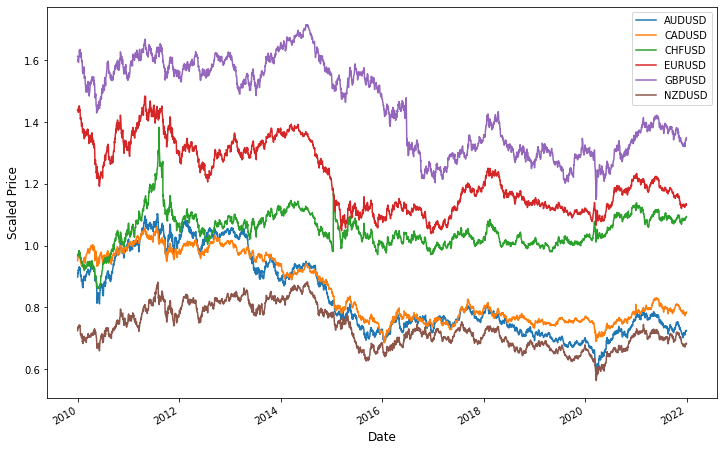

In [130]:
df=df_orig.copy()

df.rename(columns={"AUDUSD=X":"AUDUSD",  "GBPUSD=X":"GBPUSD", "CADUSD=X":"CADUSD", "CHFUSD=X":"CHFUSD", \
                   "EURUSD=X":"EURUSD", "NZDUSD=X":"NZDUSD"}, inplace=True)

df.plot()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Scaled Price', fontsize=12)
plt.legend(prop={'size': 10})
plt.show()

In [131]:
df.head()

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.613294,0.724480
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.611370,0.734214
2010-01-05,0.911826,0.962001,0.967399,1.436596,1.599079,0.733783
2010-01-06,0.920471,0.969086,0.973141,1.440403,1.602384,0.738007
2010-01-07,0.917768,0.967118,0.967492,1.431803,1.593397,0.732708


In [132]:
df.isnull().sum()

AUDUSD    2
CADUSD    2
CHFUSD    4
EURUSD    1
GBPUSD    1
NZDUSD    1
dtype: int64

In [133]:
df1 = df.dropna()

In [134]:
df1.isnull().sum()

AUDUSD    0
CADUSD    0
CHFUSD    0
EURUSD    0
GBPUSD    0
NZDUSD    0
dtype: int64

In [135]:
df1.shape

(3123, 6)

In [136]:
# Choosing the Trading Instrument

Trading_Instrument = 'AUDUSD'

Y = df1['AUDUSD']

X = df1[['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD']]

In [137]:
print(Y.shape)
print(X.shape)

(3123,)
(3123, 5)


In [138]:
X.describe()


,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
count,3123.000000,3123.000000,3123.000000,3123.000000,3123.000000
mean,0.853227,1.049592,1.219431,1.449320,0.732634
std,0.105898,0.057200,0.107839,0.142372,0.066661
min,0.685965,0.860067,1.039047,1.149439,0.562610
25%,0.760667,1.011181,1.124354,1.310814,0.680589
50%,0.798786,1.042133,1.190051,1.459620,0.719114
75%,0.969147,1.087666,1.317011,1.574654,0.788955
max,1.060220,1.383509,1.484406,1.716090,0.882379


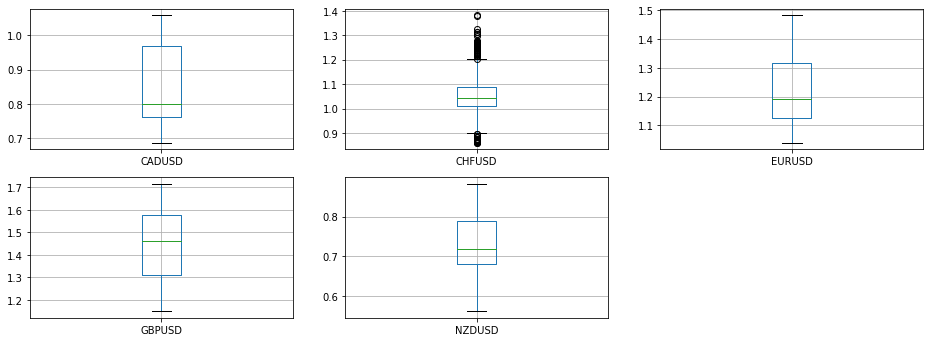

In [139]:
fig=plt.figure(figsize=(16,15))
columns=X.columns

for x, i in zip(columns, range(len(columns))):
    ax=fig.add_subplot(5,3,i+1)
    df.boxplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


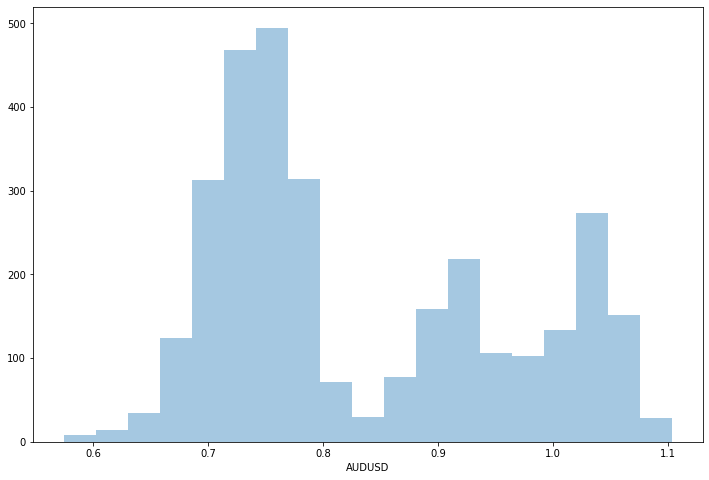

In [140]:
 # Target Variable Distribution
 sns.distplot(Y, kde=False,)

#B. Use the 2010-2020 data for training. One each day, use the closing price for the 5 pairs of currency (exclude the trading instrument you have chosen) to predict the closing price of the trading instrument (5 features, the target variable is the closing price of the trading instrument). You can choose any ML program you like.

In [141]:
df2=df.copy()
df2.isnull().sum()

AUDUSD    2
CADUSD    2
CHFUSD    4
EURUSD    1
GBPUSD    1
NZDUSD    1
dtype: int64

In [142]:
df3 = df2.dropna()
df3.isnull().sum()

AUDUSD    0
CADUSD    0
CHFUSD    0
EURUSD    0
GBPUSD    0
NZDUSD    0
dtype: int64

In [143]:
df4 = df3.copy()
df4.head(2)

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
Date,,,,,,
2010-01-01,0.898473,0.951294,0.967211,1.438994,1.613294,0.724480
2010-01-04,0.912492,0.960615,0.971723,1.442398,1.611370,0.734214


In [144]:
df4.reset_index(inplace=True)
df4.head(2)
print(df4.shape)


(3123, 7)


In [145]:
#Scale the data
# here we will be scaling only those columns which will act as input to the model.
# We will leave 'Date' & 'AUDUSD' unscaled

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))
df5=scaler.fit_transform(df4[['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD']])

In [146]:
df5= pd.DataFrame(df5,columns=['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD'])
df5

,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
0,0.708951,0.204692,0.898032,0.818590,0.506210
1,0.733856,0.213311,0.905675,0.815195,0.536651
2,0.737560,0.205050,0.892647,0.793504,0.535303
3,0.756491,0.216021,0.901197,0.799337,0.548513
4,0.751233,0.205229,0.881886,0.783477,0.531941
...,...,...,...,...,...
3118,0.252318,0.436212,0.209670,0.337053,0.371860
3119,0.256721,0.439887,0.210967,0.343824,0.372737
3120,0.252481,0.440478,0.207541,0.342167,0.368860
3121,0.257440,0.448004,0.217729,0.353728,0.379528


In [147]:
df6 = pd.concat([df4['Date'],df5],axis=1)
df6.head()

,Date,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
0,2010-01-01,0.708951,0.204692,0.898032,0.818590,0.506210
1,2010-01-04,0.733856,0.213311,0.905675,0.815195,0.536651
2,2010-01-05,0.737560,0.205050,0.892647,0.793504,0.535303
3,2010-01-06,0.756491,0.216021,0.901197,0.799337,0.548513
4,2010-01-07,0.751233,0.205229,0.881886,0.783477,0.531941


In [148]:
df7 = pd.concat([df4['AUDUSD'],df6],axis=1)
df7.head(2)

,AUDUSD,Date,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
0,0.898473,2010-01-01,0.708951,0.204692,0.898032,0.818590,0.506210
1,0.912492,2010-01-04,0.733856,0.213311,0.905675,0.815195,0.536651


In [149]:
 df7['Date'].astype

<bound method NDFrame.astype of 0      2010-01-01
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
3118   2021-12-27
3119   2021-12-28
3120   2021-12-29
3121   2021-12-30
3122   2021-12-31
Name: Date, Length: 3123, dtype: datetime64[ns]>

In [150]:
# Splitting based on Date

split_date = pd.datetime(2020,12,31)

df_training = df7.loc[df7['Date'] <= split_date]
df_prediction = df7.loc[df7['Date'] > split_date]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
df_training

,AUDUSD,Date,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
0,0.898473,2010-01-01,0.708951,0.204692,0.898032,0.818590,0.506210
1,0.912492,2010-01-04,0.733856,0.213311,0.905675,0.815195,0.536651
2,0.911826,2010-01-05,0.737560,0.205050,0.892647,0.793504,0.535303
3,0.920471,2010-01-06,0.756491,0.216021,0.901197,0.799337,0.548513
4,0.917768,2010-01-07,0.751233,0.205229,0.881886,0.783477,0.531941
...,...,...,...,...,...,...,...
2857,0.760680,2020-12-25,0.246767,0.501285,0.402876,0.363120,0.472653
2858,0.761191,2020-12-28,0.248160,0.504829,0.407451,0.366716,0.465810
2859,0.758892,2020-12-29,0.248095,0.507561,0.411572,0.347945,0.463428
2860,0.760990,2020-12-30,0.251001,0.517778,0.418197,0.353924,0.476125


In [152]:
df_prediction

,AUDUSD,Date,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
2862,0.770297,2021-01-01,0.330678,0.484094,0.401877,0.384473,0.486570
2863,0.771230,2021-01-04,0.267381,0.520225,0.417691,0.386448,0.491695
2864,0.767100,2021-01-05,0.257702,0.524791,0.417893,0.366576,0.485409
2865,0.776600,2021-01-06,0.275235,0.532345,0.428823,0.376804,0.509991
2866,0.781700,2021-01-07,0.276783,0.532618,0.437992,0.376050,0.525278
...,...,...,...,...,...,...,...
3118,0.723129,2021-12-27,0.252318,0.436212,0.209670,0.337053,0.371860
3119,0.723700,2021-12-28,0.256721,0.439887,0.210967,0.343824,0.372737
3120,0.723400,2021-12-29,0.252481,0.440478,0.207541,0.342167,0.368860
3121,0.725879,2021-12-30,0.257440,0.448004,0.217729,0.353728,0.379528


In [153]:
# Separating the training data from Target variable in DataFrame 'df_training'

X = df_training[['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD']]
Y = df_training[Trading_Instrument]

In [154]:
print(X.shape)
print(Y.shape)

(2862, 5)
(2862,)


In [155]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state = 1)

In [156]:
print(x_train.shape)
print(x_test.shape)

(2289, 5)
(573, 5)


In [157]:
# Let us declare the lists in which we will be storing our model names, fitted models, mse & rmse Score

model_name=[]
fitted_models =[]
MSE_No_CV = []
RMSE_No_CV = []

In [158]:
#creating a model
from sklearn.linear_model import LinearRegression

# creating a object
lr_regressor = LinearRegression()

#training the model
lr_regressor.fit(x_train, y_train)

LinearRegression()

In [159]:
#using the training dataset for the prediction
pred = lr_regressor.predict(x_test)

In [160]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

In [161]:
#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  0.0006399616835318962
Root Mean squared Error:  0.025297463974317588


In [162]:
model_name.append('Linear Regression')
fitted_models.append(lr_regressor)
MSE_No_CV.append(mse)
RMSE_No_CV.append(rmse)

In [163]:
#RMSE
rmse=np.sqrt(np.mean((pred-y_test)**2))
rmse

0.02529746397431759

In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

In [165]:
print(poly_clf.score(x_train2, y_train))
print(poly_clf.score(x_test2, y_test))
print(x_train2.shape)
print(x_test2.shape)


0.9867924710694592
0.9847323529040444
(2289, 56)
(573, 56)


In [166]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)#Best fit lineplt.scatter(x, y)

In [167]:
#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  0.00026696500726038964
Root Mean squared Error:  0.01633906384283964


In [168]:
model_name.append('Polynomial Regression')
fitted_models.append(poly_clf)
MSE_No_CV.append(mse)
RMSE_No_CV.append(rmse)

In [169]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor()

In [170]:
dtree.fit(x_train,y_train)


DecisionTreeRegressor()

In [171]:
dtree.score(x_train,y_train)


1.0

In [172]:
dtree.score(x_test,y_test)


0.9953103928845239

In [173]:
pred = dtree.predict(x_test)

In [174]:
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

In [175]:
#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  8.200091276429031e-05
Root Mean squared Error:  0.00905543553697393


In [176]:
model_name.append('Decision Tree Regressor')
fitted_models.append(dtree)
MSE_No_CV.append(mse)
RMSE_No_CV.append(rmse)

In [177]:
pd.DataFrame(dtree.feature_importances_,columns=['Feature Importance'], index=x_train.columns).sort_values(by='Feature Importance',ascending=False)


,Feature Importance
CADUSD,0.917524
NZDUSD,0.052416
CHFUSD,0.019252
EURUSD,0.007517
GBPUSD,0.003290


In [178]:
import xgboost
xgb_regressor=xgboost.XGBRegressor()

In [179]:
xgb_regressor.fit(x_train,y_train)


[17:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [180]:
print(xgb_regressor.score(x_train,y_train))
print(xgb_regressor.score(x_test,y_test))

0.9933625816916825
0.9912160200238257


In [181]:
pred = xgb_regressor.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  0.00015359375700632166
Root Mean squared Error:  0.012393294840611259


In [182]:
model_name.append('XG Boost Regressor')
fitted_models.append(xgb_regressor)
MSE_No_CV.append(mse)
RMSE_No_CV.append(rmse)

In [183]:
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()

In [184]:
bgr.fit(x_train,y_train)


BaggingRegressor()

In [185]:
print(bgr.score(x_train,y_train))
print(bgr.score(x_test,y_test))

0.9990319782034932
0.9955734558551411


In [186]:
pred = bgr.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  7.74010810142259e-05
Root Mean squared Error:  0.008797788416086505


In [187]:
model_name.append('Bagging Regressor')
fitted_models.append(bgr)
MSE_No_CV.append(mse)
RMSE_No_CV.append(rmse)

In [188]:
abc = pd.DataFrame(list(zip(model_name,MSE_No_CV,RMSE_No_CV)),columns=['Models_Used','MSE_No_CV','RMSE_No_CV'])
abc

,Models_Used,MSE_No_CV,RMSE_No_CV
0,Linear Regression,0.000640,0.025297
1,Polynomial Regression,0.000267,0.016339
2,Decision Tree Regressor,0.000082,0.009055
3,XG Boost Regressor,0.000154,0.012393
4,Bagging Regressor,0.000077,0.008798


### GridSearch CV

In [189]:
# Let us declare the lists in which we will be storing our model names, fitted models, mse & rmse Score

CV_Model_name=[]
CV_fitted_models =[]
CV_MSE = []
CV_RMSE= []

In [190]:
params={
    'n_estimators'      : [50,75,100,150,200],
    'max_depth'         : [11,15,17,19,22],
    'min_samples_split' : [3,5,7,9,11,13,15]
}

In [191]:
from sklearn.ensemble import  RandomForestRegressor
rfr =  RandomForestRegressor()

In [192]:
from sklearn.model_selection import GridSearchCV
rfr_GS = GridSearchCV(rfr,param_grid=params,n_jobs=-1,cv=5)

In [193]:
rfr_GS.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [11, 15, 17, 19, 22],
                         'min_samples_split': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 75, 100, 150, 200]})

In [194]:
rfr_GS.best_estimator_


RandomForestRegressor(max_depth=19, min_samples_split=3)

In [195]:
randomforest=rfr_GS.best_estimator_
randomforest.fit(x_train,y_train)
print(randomforest.score(x_train,y_train))
print(randomforest.score(x_test,y_test))

0.9993661189769507
0.9962284566689747


In [196]:
pred = randomforest.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  6.594795428673206e-05
Root Mean squared Error:  0.00812083458067778


In [197]:
CV_Model_name.append('Random Forest Regressor')
CV_fitted_models.append(randomforest)
CV_MSE.append(mse)
CV_RMSE.append(rmse)

In [198]:
import xgboost
xgbregressor=xgboost.XGBRegressor()

In [199]:
param_xgb={
    'max_depth'       : [3,5,7,10,15,20,25,30],
    'learning_rate'   : [0.001,0.01,0.1,0.3,0.5,0.8],
    'n_estimators'    : [20,50,70,100,125,150,200,300]
}

In [200]:
from sklearn.model_selection import GridSearchCV
xgb_GS = GridSearchCV(xgbregressor,param_grid=param_xgb,n_jobs=-1,cv=5)

In [201]:
xgb_GS.fit(x_train,y_train)

[17:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.8],
                         'max_depth': [3, 5, 7, 10, 15, 20, 25, 30],
                         'n_estimators': [20, 50, 70, 100, 125, 150, 200, 300]})

In [202]:
xgb_GS.best_estimator_


XGBRegressor(max_depth=15, n_estimators=300)

In [203]:
xgb=xgboost.XGBRegressor(learning_rate=0.3, n_estimators=300)
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

[17:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9989323581241463
0.9943438384001433


In [204]:
pred = xgb.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  9.890176351873426e-05
Root Mean squared Error:  0.009944936576908587


In [205]:
CV_Model_name.append('XG Boost Regressor')
CV_fitted_models.append(xgb)
CV_MSE.append(mse)
CV_RMSE.append(rmse)

In [206]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [207]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9700450306995428
0.9653305409493564


In [208]:
pred = clf.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  0.0006062186484268822
Root Mean squared Error:  0.024621507842268357


In [209]:
CV_Model_name.append('Bagging Regressor')
CV_fitted_models.append(clf)
CV_MSE.append(mse)
CV_RMSE.append(rmse)

In [210]:
abcd = pd.DataFrame(list(zip(CV_Model_name,CV_MSE,CV_RMSE)),columns=['CV_Model_name','CV_MSE','CV_RMSE'])
abcd

,CV_Model_name,CV_MSE,CV_RMSE
0,Random Forest Regressor,0.000066,0.008121
1,XG Boost Regressor,0.000099,0.009945
2,Bagging Regressor,0.000606,0.024622


In [211]:
abc

,Models_Used,MSE_No_CV,RMSE_No_CV
0,Linear Regression,0.000640,0.025297
1,Polynomial Regression,0.000267,0.016339
2,Decision Tree Regressor,0.000082,0.009055
3,XG Boost Regressor,0.000154,0.012393
4,Bagging Regressor,0.000077,0.008798


# C. Implement a trading strategy similar to the StatArb for the year 2021. The trading signal is generated in the following way: On each day, if your ML predicted price is higher than the ACTUAL closing price (by a certain threshold), it is a buy signal; if the predicted price is lower than the actual closing price by a certain threshold, you should short.

In [212]:
# Here we will separate the 'df_prediction' 

In [213]:
df_prediction.head()

,AUDUSD,Date,CADUSD,CHFUSD,EURUSD,GBPUSD,NZDUSD
2862,0.770297,2021-01-01,0.330678,0.484094,0.401877,0.384473,0.486570
2863,0.771230,2021-01-04,0.267381,0.520225,0.417691,0.386448,0.491695
2864,0.767100,2021-01-05,0.257702,0.524791,0.417893,0.366576,0.485409
2865,0.776600,2021-01-06,0.275235,0.532345,0.428823,0.376804,0.509991
2866,0.781700,2021-01-07,0.276783,0.532618,0.437992,0.376050,0.525278


In [214]:

x_test = df_prediction[['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD']]
y_test = df_prediction[Trading_Instrument]

In [215]:
df_pnl = df_prediction[['Date','AUDUSD']]
df_pnl.columns = ['Date','y_true']
df_pnl.head()

,Date,y_true
2862,2021-01-01,0.770297
2863,2021-01-04,0.771230
2864,2021-01-05,0.767100
2865,2021-01-06,0.776600
2866,2021-01-07,0.781700


In [216]:
df_pnl.reset_index(inplace=True)
df_pnl.drop('index',inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Note :- Here we are using the Random Forest Regressor Model without CV which we have already trained. We are using this model as it gives us the lease RMSE.


In [217]:
pred = rfr_GS.predict(x_test)


In [218]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)#Best fit lineplt.scatter(x, y)

In [219]:
#Results
print("Mean Squared Error : ", mse)
print("Root Mean squared Error: ", rmse)

Mean Squared Error :  0.0011314894539405944
Root Mean squared Error:  0.03363761962357911


In [220]:
pred.shape

(261,)

In [221]:
predicted = pd.DataFrame(pred,columns=['y_predicted'])
predicted.head()

,y_predicted
0,0.803796
1,0.770505
2,0.763821
3,0.783299
4,0.786030


In [222]:
df_pnl = pd.concat([df_pnl,predicted],axis=1)

In [223]:
df_pnl

,Date,y_true,y_predicted
0,2021-01-01,0.770297,0.803796
1,2021-01-04,0.771230,0.770505
2,2021-01-05,0.767100,0.763821
3,2021-01-06,0.776600,0.783299
4,2021-01-07,0.781700,0.786030
...,...,...,...
256,2021-12-27,0.723129,0.748783
257,2021-12-28,0.723700,0.749367
258,2021-12-29,0.723400,0.746976
259,2021-12-30,0.725879,0.752683


In [224]:
df_pnl['Pct_diff %'] = ((df_pnl['y_predicted']/df_pnl['y_true']) - 1)*100
df_pnl.head()

,Date,y_true,y_predicted,Pct_diff %
0,2021-01-01,0.770297,0.803796,4.348752
1,2021-01-04,0.771230,0.770505,-0.094025
2,2021-01-05,0.767100,0.763821,-0.427514
3,2021-01-06,0.776600,0.783299,0.862598
4,2021-01-07,0.781700,0.786030,0.553905


In [225]:
print(max(df_pnl['Pct_diff %']))
print(min(df_pnl['Pct_diff %']))

8.081778765346614
-2.611804368144599


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


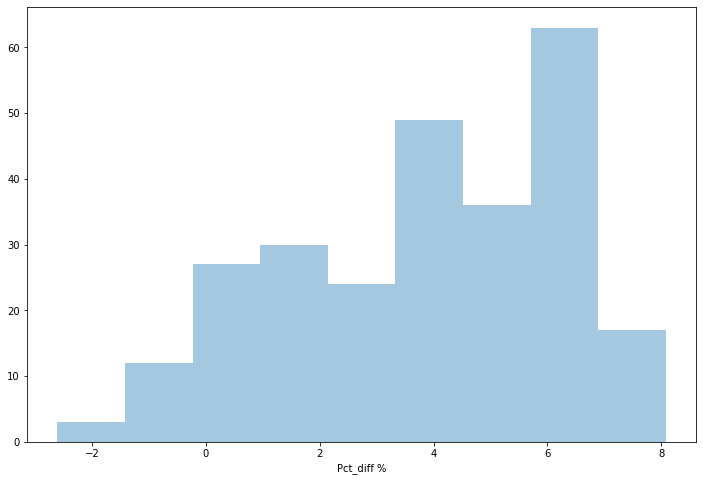

In [226]:
 sns.distplot(df_pnl['Pct_diff %'], kde=False,)

In [227]:
df_pnl[df_pnl['Pct_diff %']<= 0].shape

(19, 4)

In [228]:
# This means there are only 17 values which are above zero and maximum positive percent prediction is 0.98%.
# While all the remaining values are on the other side
# On the other side the maximum percent difference is 7.28%..
# Let us decide the threshold as 1%

threshold = 0.01

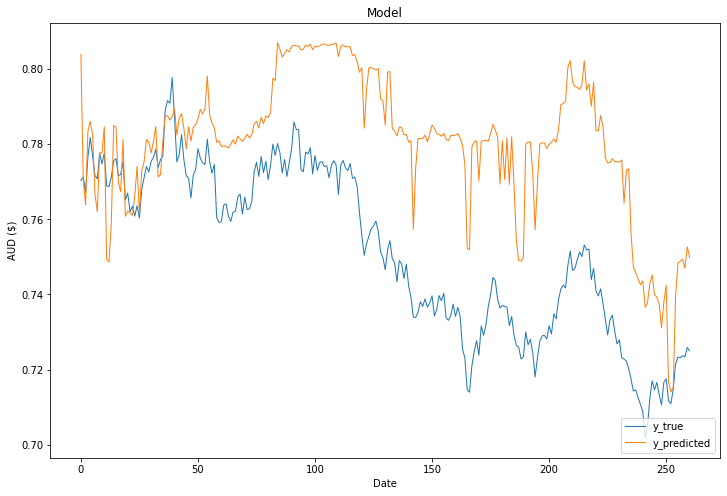

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('AUD ($)')
plt.plot(df_pnl['y_true'], lw=1)
plt.plot(df_pnl['y_predicted'], lw=1)
plt.legend(['y_true','y_predicted'],loc='lower right')
plt.show()


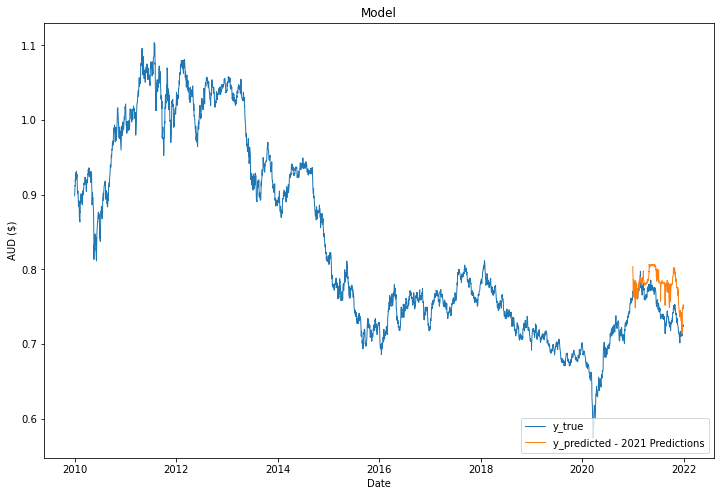

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('AUD ($)')
# plt.plot(df_pnl['y_true'], lw=1)
plt.plot(df7['Date'],df7['AUDUSD'], lw=1)
plt.plot(df_pnl['Date'],df_pnl['y_predicted'], lw=1)

plt.legend(['y_true','y_predicted - 2021 Predictions'],loc='lower right')
plt.show()


In [231]:
def Action(x):
    if x > 0.01:
        return 1
    if x < -0.01:
        return -1
    else:
        return 0

In [232]:
df_pnl['Action'] = df_pnl['Pct_diff %'].apply(lambda x: Action(x))

In [233]:
df_pnl['Predictions_1day_backs'] = df_pnl.shift(-1)['y_predicted']


In [234]:
df_pnl['Profit'] = (df_pnl['Predictions_1day_backs'] - df_pnl['y_true']) * df_pnl['Action']

In [235]:
df_pnl

,Date,y_true,y_predicted,Pct_diff %,Action,Predictions_1day_backs,Profit
0,2021-01-01,0.770297,0.803796,4.348752,1,0.770505,0.000208
1,2021-01-04,0.771230,0.770505,-0.094025,-1,0.763821,0.007410
2,2021-01-05,0.767100,0.763821,-0.427514,-1,0.783299,-0.016199
3,2021-01-06,0.776600,0.783299,0.862598,1,0.786030,0.009430
4,2021-01-07,0.781700,0.786030,0.553905,1,0.782533,0.000833
...,...,...,...,...,...,...,...
256,2021-12-27,0.723129,0.748783,3.547650,1,0.749367,0.026239
257,2021-12-28,0.723700,0.749367,3.546703,1,0.746976,0.023276
258,2021-12-29,0.723400,0.746976,3.259014,1,0.752683,0.029283
259,2021-12-30,0.725879,0.752683,3.692670,1,0.749853,0.023974


In [236]:
df_pnl[df_pnl['Action'] !=0]

,Date,y_true,y_predicted,Pct_diff %,Action,Predictions_1day_backs,Profit
0,2021-01-01,0.770297,0.803796,4.348752,1,0.770505,0.000208
1,2021-01-04,0.771230,0.770505,-0.094025,-1,0.763821,0.007410
2,2021-01-05,0.767100,0.763821,-0.427514,-1,0.783299,-0.016199
3,2021-01-06,0.776600,0.783299,0.862598,1,0.786030,0.009430
4,2021-01-07,0.781700,0.786030,0.553905,1,0.782533,0.000833
...,...,...,...,...,...,...,...
256,2021-12-27,0.723129,0.748783,3.547650,1,0.749367,0.026239
257,2021-12-28,0.723700,0.749367,3.546703,1,0.746976,0.023276
258,2021-12-29,0.723400,0.746976,3.259014,1,0.752683,0.029283
259,2021-12-30,0.725879,0.752683,3.692670,1,0.749853,0.023974


In [237]:
# Total Profit
df_pnl['Profit'].sum()

7.463223333863993

In [238]:
# Given that average value of AUDUSD is less than 1, if for entire year we get profit of 7+ for trading just 1 unit of currency,
# means we have multiplied our profit 7+ times.


# D. Extend the implementation to the case where you can also use historical prices (eg.,like the LSTM program you used in Assignment 2. You can use the CURRENT closing price as well for all the pairs except the trading instrument you have chosen.

In [257]:
X = df_training[['CADUSD','CHFUSD','EURUSD','GBPUSD','NZDUSD']]
Y = df_training[Trading_Instrument]

In [258]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state = 1)

In [259]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(y_test.shape)

(2289, 5)
(573, 5)
(2289,)
(573,)


In [260]:
X_train.shape

(2289, 5)

In [261]:
Y_train = Y_train.values

### The window we use is n_period as input

In [262]:
n_period=60

x_train=[]
y_train=[]

for i in range(n_period, len(X_train)):
    x_train.append(X_train[i-n_period:i]) 
    y_train.append(Y_train[i-1])
    

In [263]:
#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [264]:
x_train.shape

(2229, 60, 5)

In [265]:
# x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2229, 60, 5)

In [266]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [267]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],5)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))
          

In [268]:
model.compile(optimizer='SGD', loss='mean_squared_error') 

In [269]:
model.fit(x_train,y_train, batch_size=1, epochs=20)

Epoch 1/20
2229/2229 [==============================] - 26s 10ms/step - loss: 0.0199
Epoch 2/20
2229/2229 [==============================] - 21s 10ms/step - loss: 0.0184
Epoch 3/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0182
Epoch 4/20
2229/2229 [==============================] - 20s 9ms/step - loss: 0.0181
Epoch 5/20
2229/2229 [==============================] - 20s 9ms/step - loss: 0.0179
Epoch 6/20
2229/2229 [==============================] - 20s 9ms/step - loss: 0.0178
Epoch 7/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0178
Epoch 8/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0177
Epoch 9/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0177
Epoch 10/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0175
Epoch 11/20
2229/2229 [==============================] - 21s 9ms/step - loss: 0.0175
Epoch 12/20
2229/2229 [==============================] - 24s 11ms/step -

In [270]:

x_test=[]
y_test = y_test.values
y_test = y_test[60:]
for i in range(60, len(X_test)):
    x_test.append(X_test[i-60:i])

    
               
x_test=np.array(x_test)


In [271]:
x_test.shape

(513, 60, 5)

In [272]:
y_test.shape

(513,)

Prediction

In [273]:
predictions=model.predict(x_test)
print(predictions.shape)

(513, 1)


In [274]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.01665694543957478

### Here, we are not calculation profit because the RMSE value which we have got is far lesser than the RMSE Score we got in ML models. So, it would be better to use ML model.